## Exercise "Natural Language Processing" -- Text Mining and classification

---


For this course, save a COPY to your Google Drive for the tutorial (File -> Save copy in Drive). Then complete the tasks in your saved copy. If you're done, submit the notebook via moodle by sharing a link with the appropriate permissions (preferred, but please do not make changes after the deadline) or by submitting the downloaded `.ipynb` file.

This is an individual assignment, i.e., submit your solutions individually.
This assignment is **ungraded/optional**.

Due date: 011.05.2023, 9:15 a.m.(CEST)


# Text classification
In this assignment, you will be working on the topic of sentiment analysis using the Twitter US Airline Sentiment dataset. We highly encourage you to use the `scikit-learn` library for this assignment.

Download the dataset from [this link](https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment) and mount it to your Colab. Alternatively, use the following code for getting the data. Notice that kaggle needs login and the url you need to use for `curl` needs to have the authorization information.

In [ ]:
!curl {storage_url_with_auth_header}  --compressed --output sentiment.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2615k  100 2615k    0     0  17.1M      0 --:--:-- --:--:-- --:--:-- 17.1M


In [ ]:
!unzip sentiment.zip

Archive:  sentiment.zip
replace Tweets.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!cat Tweets.csv

Streaming output truncated to the last 5000 lines.
568433759919452160,positive,0.6669,,0.0,United,,BurgerFreshh,,0,@united Keep the flights cheap and early/on time and you are good. Flew @AmericanAir  and Cancelled Flightled my flight 4 times last month. United&gt;,,2015-02-19 07:35:44 -0800,"Houston, Tx & Old Bridge, NJ ",Eastern Time (US & Canada)
568433610765815808,negative,1.0,Cancelled Flight,0.3626,United,,alex_nieves,,0,@united the Premier desk was able to rebook me with our friends at @AmericanAir. Only problem is now I have to pay for a checked bag :/,,2015-02-19 07:35:08 -0800,Connecticut,Quito
568433493987844096,negative,1.0,Lost Luggage,0.6619,United,,hire_llc,,0,"@united I did, and as I thought, nothing happened",,2015-02-19 07:34:40 -0800,,
568433431471886336,negative,0.6479,Flight Booking Problems,0.6479,United,,scout_mb,,0,@united I'm not booked on a 1:30 return flight..,,2015-02-19 07:34:25 -0800,,Eastern Time (US & Canada)
568432918110064640,negative,1.0,Customer Serv

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 Luggage,1.0,American,,Wswallace1,,0,"@AmericanAir lost 3 pieces of our bags, haven't delivered them in 36 hours, lied that they were delivered, and still no refund.  Never again",,2015-02-23 16:30:24 -0800,,
570017634495787009,negative,1.0,Late Flight,1.0,American,,nf14jk,,0,@AmericanAir improve Envoy's performance.  5th trip through ORD in 2015 I've been delayed for hours because of Envoy.  I could drive faster!,,2015-02-23 16:29:29 -0800,,
570017101097934849,negative,1.0,Cancelled Flight,1.0,American,,melindaeasley,,0,@AmericanAir two Cancelled Flightled LGA flights. Both by @Delta took off. Looks like I have a new carrier @Delta!,"[35.87658269, -78.79254351]",2015-02-23 16:27:21 -0800,Manhattan ,Eastern Time (US & Canada)
570016890996666368,positive,0.6621,,0.0,American,,PareshRP,,0,@AmericanAir Lady at B1 ABQ for 5347 on 2/23 was of a great service to all among several Cancelled Flightlations,,2015-02-23 16:26:31 -0800,"Charlotte, NC",Eastern Time (US & Canada)
570016770708283392,

You will be mainly working with the data in `Tweets.csv` file.

**TASK 1:** Then perform explantory data analys on this dataset.

1. Is the data clean? Does it include `NaN`s? How many NaNs in `text` and `airline_sentiment` attributes? If either of `text` or `airline_sentiment` include `NaN` values, remove them.
2. How does the distribution of sentiments look? (Use the `airline_sentiment` attribute)
3. How is the distribution of sentiments w.r.t. each airline? (Hint: Use `histtype='barstacked'` from `Matplotlib`)
3. How does the distribution of tweet lengths, i.e., number of words, look? (Use the `text` attribute)


In [ ]:
# Solution
import pandas as pd

path = 'Tweets.csv'
df = pd.read_csv(path)
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
# Solution: NaNs

cnt_text_nans = df['text'].isna().sum()
cnt_sentiment_nans = df['airline_sentiment'].isna().sum()

print(f'Number of NaNs/empty cells in texts: {cnt_text_nans}')
print(f'Number of NaNs/empty cells in sentiments: {cnt_sentiment_nans}')

Number of NaNs/empty cells in texts: 0
Number of NaNs/empty cells in sentiments: 0


<Axes: >

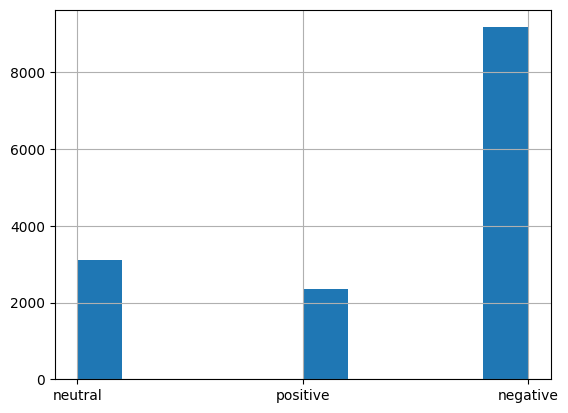

In [ ]:
# Solution: Distribution of sentiments
df['airline_sentiment'].hist()

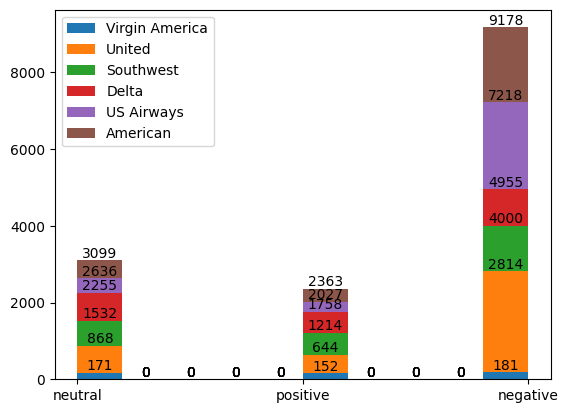

In [ ]:
# Solution: Distribution of sentiments with regards to each airline
from matplotlib import pyplot as plt

fig, ax = plt.subplots()

airlines = df['airline'].unique()  # give the unique set of airlines

def get_airline_sentiment(airline):
    airline_df = df[df['airline']==airline]  # get the subset of dataframe where the airline column equals the input airline
    airline_sentiments = airline_df['airline_sentiment']
    return airline_sentiments

all_data = [get_airline_sentiment(airline) for airline in airlines]

counts, edges, bars = ax.hist(all_data, histtype='barstacked')

for i, bar in enumerate(bars):
    ax.bar_label(bar, fontsize=10)

ax.legend(airlines)

<Axes: >

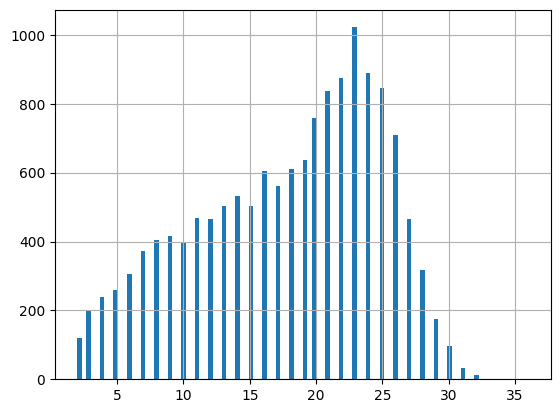

In [ ]:
# Solution: Distribution of tweets length

def get_number_of_words(text):
  words = text.strip().split(' ')  # `strip` removes unwanted spaces in the begining or the end of the text. For getting words, we simply split the string by whitespace.
  return len(words)

df['tweet_length'] = df['text'].apply(lambda x: get_number_of_words(x))
df['tweet_length'].hist(bins=100)

## Text Classification: Multi-layer Perceptron (MLP) and TF-IDF features

In this section, you will be traing a shallow neural network, i.e., multi-layer perceptron, using TF-IDF features for classifying the sentiment of input texts. You are highly encouraged to use the `scikit-learn` library for the tasks in this assignment.

**TASK 2:** Pre-process the input texts, i.e., tweets, for classification. You can use external libraries like `nltk` for this task.

1. Bring the texts to lower case.
2. Remove stop words from the lower-cased text.
3. Perform lemmatization on the lower-cased text without stop words.


In [ ]:
# Solution: lower-case
df['text_lowered'] = df['text'].apply(lambda x: x.lower())

In [ ]:
# Solution: stopwords
## To remove the stopwords, you need to 'define' the stopwords, tokenize text (split words) and only keep the words that are not in the stopwords set!
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize  # Look at https://www.nltk.org/api/nltk.tokenize.html for more information on different tokenizers on `nltk`

stop_words = set(stopwords.words('english'))

def remove_stopwords(text, stopwords):
  tokenized_text = wordpunct_tokenize(text)
  text_without_stopwords = [w for w in tokenized_text if w not in stopwords]
  text = ' '.join(text_without_stopwords)
  return text

df['text_lowered_without_stopwords'] = df['text_lowered'].apply(lambda x: remove_stopwords(x, stop_words))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Solution: lemmatize
## What is the difference between lemmatizing and stemming? What happens to 'caring' in both cases?
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize(text, lemmatizer):
  text = lemmatizer.lemmatize(text)
  return text


df['text_lowered_without_stopwords_lemmatized'] = df['text_lowered_without_stopwords'].apply(lambda x: lemmatize(x, lemmatizer))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**TASK 3:**
1. Obtain TF-IDF features for the pre-processed input texts. You are encouraged to use the `scikit-learn` for this.
2. Split the data into train and test.

In [ ]:
# Solution
## Should we do TF-IDF before or after train/test split? After!
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer  # hint

np.random.seed(42)  # this is to make sure you get reproducable results

mask = np.random.rand(len(df)) < 0.8  # I choose 20% of the data as test set

train_df = df[mask]
test_df = df[~mask]

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_df['text_lowered_without_stopwords_lemmatized'])  # fit the vectorizer, i.e., calculate the TF-IDF values according to the training set. Why don't we use the test set?
y_train = train_df['airline_sentiment']

def tf_idf(texts, tfidf_vectorizer):
  return tfidf_vectorizer.transform(texts)

X_test = tf_idf(test_df['text_lowered_without_stopwords_lemmatized'], vectorizer)
y_test = test_df['airline_sentiment']

# Look at https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html for more information

**TASK 4:**
1. Train a 2-layer perceptron with one hidden layer of the size 30 on your training data. You are encouraged to use the `scikit-learn` library for this task. You can use the default hyperparameters set [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html).

2. Test your trained MLP on the test data and report accuracy, f1_score and confusion matrix of the predictions.

Food for thought: Which hyperparameter values can improve your model? Hint: Look at the guidelines at the end of this notebook.


In [ ]:
# Solution
from sklearn.neural_network import MLPClassifier as MLP # hint
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

classifier = MLP(random_state=42, max_iter=200, hidden_layer_sizes=(30,))  # for a 3-layer perceptron, set hidden_layer_sizes=(30, 30,)
classifier.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(30,), random_state=42)

In [ ]:
predictions = classifier.predict(X_test)
acc = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average='macro')

print(f'Accuracy: {acc}')
print(f'F1_score: {f1}')

Accuracy: 0.7154082678510421
F1_score: 0.634738151286145


**TASK 5:** From task 1, you might have noticed that most of the tweets start with "@{airline_username}", e.g., "@VirginAmerica". In this task, you will test if your trained model has been biased with respect to the airline name or not.

1. What fraction of the tweets start with "@{airline_username}"?
2. Remove "@{airline_username}" from all the texts that start with this pattern.
3. Re-apply the pre-processings from TASK 2 and re-fit your TF-IDF feature on the new texts.
4. Re-train your MLP using the TF-IDF features from step 3. Make sure to use the same train/test split.
5. Test your new MLP and report accuracy, f1_score, confusion matrix. Are the results different from task 4? How do you interpret your observations?

In [ ]:
airlines

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

In [ ]:
# Solution: airline username analysis

airlines = [a.replace(' ', '', 1) for a in airlines]  # airline usernames don't have white spaces! So we need to replace them!
airline_usernames = ['@'+airline+' ' for airline in airlines]  # Since usually there is a whitespace after the username in the text
airline_usernames = tuple(airline_usernames)  # because `startswith` works with tuple for checking if any of the elements
print(f'Airline usernames: {airline_usernames}')

# df['text'].apply(lambda x: x.startswith(airline_usernames))  -> this gives you True for all the text cells that start with either elements in the airline_usernames tuple! If we then call `.sum()`, if counts the True values
cnt_texts_starting_with_username = df['text'].apply(lambda x: x.startswith(airline_usernames)).sum()
fraction = cnt_texts_starting_with_username / df.shape[0]
print(f'Fraction of tweets starting with airline username: {fraction}')

Airline usernames: ('@VirginAmerica ', '@United ', '@Southwest ', '@Delta ', '@USAirways ', '@American ')
Fraction of tweets starting with airline username: 0.22821038251366121


In [ ]:
# Solution: Remove airline usernames and re-apply pre-processing
def remove_airline_usernames(text, airline_usernames):
  for uname in airline_usernames:
    if text.startswith(uname):
      text = text.replace(uname, '')
    return text

df['text'] = df['text'].apply(lambda x: remove_airline_usernames(x, airline_usernames))
df['text_lowered'] = df['text'].apply(lambda x: x.lower())
df['text_lowered_without_stopwords'] = df['text_lowered'].apply(lambda x: remove_stopwords(x, stop_words))
df['text_lowered_without_stopwords_lemmatized'] = df['text_lowered_without_stopwords'].apply(lambda x: lemmatize(x, lemmatizer))

In [ ]:
df['text_lowered_without_stopwords_lemmatized'].head(10)

0                                    @ dhepburn said .
1      plus ' added commercials experience ... tacky .
2       ' today ... must mean need take another trip !
3    ' really aggressive blast obnoxious " entertai...
4                               ' really big bad thing
5    seriously would pay $ 30 flight seats ' playin...
6    yes , nearly every time fly vx “ ear worm ” ’ ...
7    really missed prime opportunity men without ha...
8                      @ virginamerica well , ' … ! :-
9              amazing , arrived hour early . ' good .
Name: text_lowered_without_stopwords_lemmatized, dtype: object

In [ ]:
# Solution: re-fit TF-IDF
train_df = df[mask]
test_df = df[~mask]

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_df['text_lowered_without_stopwords_lemmatized'])
y_train = train_df['airline_sentiment']


X_test = tf_idf(test_df['text_lowered_without_stopwords_lemmatized'], vectorizer)
y_test = test_df['airline_sentiment']

In [ ]:
# Solution: re-fit MLP
classifier = MLP(random_state=42, max_iter=200, hidden_layer_sizes=(30,))
classifier.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(30,), random_state=42)

In [ ]:
# Solution: test the new MLP
predictions = classifier.predict(X_test)
acc = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average='macro')

print(f'Accuracy: {acc}')
print(f'F1_score: {f1}')

Accuracy: 0.7137000341646738
F1_score: 0.6318539615284541


**TASK 6**: In this task, you will analyze how your MLP features/neurons are behaving with respect to class prediction. To this end, you will examine which neurons in your MLP model have the largest weights when predicting classes.

1. Using the `coefs_` attribute from your trained MLP model, plot a bar chart that shows the score of each of the 30 neurons in your model for each class.

Hint: Plot the scores only for the output layer. You don't need to plot the scores for the hidden layer.

In [ ]:
print(len(classifier.coefs_))  # since there are two layers, we have a list of length 2 for the coefficients for the each layer.
print(classifier.coefs_[1].shape)  # Size of the second layer, i.e., the final classification layer.

2
(30, 3)


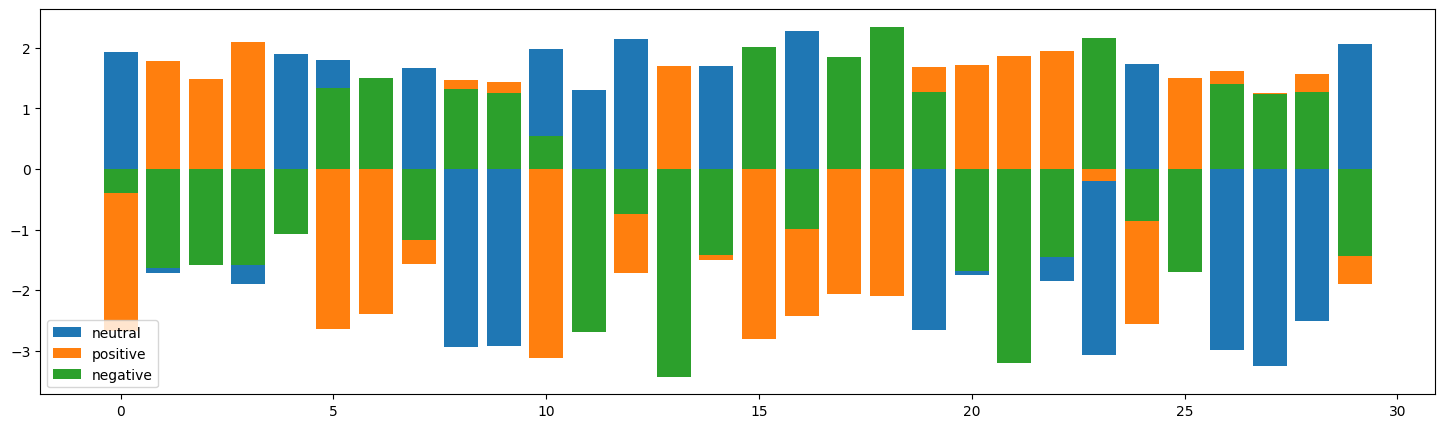

In [ ]:
# Solution
weights_cls1 = classifier.coefs_[1][:,0]  # coefficients for the first class
weights_cls2 = classifier.coefs_[1][:,1]  # coefficients for the second class
weights_cls3 = classifier.coefs_[1][:,2]  # coefficients for the third class

fig, ax = plt.subplots(figsize=(18,5))

all_data = [weights_cls1, weights_cls2, weights_cls3]
classes = ['neutral', 'positive', 'negative']  # the order is kept from the beginning

for i, data in enumerate(all_data):
    ax.bar([x for x in range(len(data))], data)
ax.legend(classes)

#### Neural Network Tuning Guide

We improve the performance of our neural networks by tuning **hyperparameters**. These are all things that influence the networks performance except for the neural netwroks weights (parameters), which are tuned during training. Hyperparameters include:
- The learning rate
- The number of training epochs or iterations
- The choice for optimizer
- Network architecture
  - The number of layers in the network (more layers -> deeper network)
  - The "width" of layers in the network (more neurons per layer -> wider network)
  - Activation functions
- Regularization
  - L2-Regularization

This can seem overwhelming and a bit like "alchemy" (and there is some truth to this). But over time, you will reliably build an intuition about what hyperparameters are responsible for what kinds of behavior and which hyperparameters might be responsible for failure modes.

